## TP04

## Le problème de Monty Hall

Julien Krause

In [11]:
import random
import math as m
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import random

#### Question 2.1

In [2]:
def simulate_scenario_1(num_games):
    wins = 0
    for _ in range(num_games):
        player_choice = random.randint(0, 2)
        winning_door = random.randint(0, 2)
        if player_choice == winning_door:
            wins += 1
    return wins

num_games = 1000
wins_scenario_1 = simulate_scenario_1(num_games)

print("Gagner avec le scénario 1", wins_scenario_1)

Gagner avec le scénario 1 381


Avec la scénario 1, on trouve une valleur proche de 333.

#### Question 2.2

In [21]:
def simulate_scenario_2(num_games):
    wins = 0
    open_doors = []
    for _ in range(num_games):
        player_choice = random.randint(0, 2)
        winning_door = random.randint(0, 2)
        if player_choice == winning_door:
            other_doors = [door for door in range(3) if door != player_choice]
            open_door = random.choice(other_doors)
            open_doors.append(open_door)
            wins += 1
    return (wins, open_doors)

wins_scenario_2 = simulate_scenario_2(num_games)

print("Gagner avec le scénario 2:", wins_scenario_2[0])
print("Listes des portes ouvertes par Monty", wins_scenario_2[1])

Gagner avec le scénario 2: 345
Listes des portes ouvertes par Monty [2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1

Avec la scénario 2, on trouve une valleur proche de 333. Cela est cohérent avec la question 1.

#### Question 2.3 et 2.4

In [3]:
def jeu_monty_hall():
    doors = [0, 0, 0]

    winning_door = random.randint(0, 2)
    doors[winning_door] = 1

    player_choice = random.randint(0, 2)

    available_doors = [i for i in range(3) if i != player_choice and doors[i] != 1]
    opened_door = random.choice(available_doors)

    player_choice = [i for i in range(3) if i != player_choice and i != opened_door][0]

    return doors[player_choice] == 1

simulation_nb = 1000
victoires_sans_changement = 0
victoires_avec_changement = 0

for _ in range(simulation_nb):
    if jeu_monty_hall():
        victoires_avec_changement += 1
    else:
        victoires_sans_changement += 1

# Afficher les résultats
print(f"Victoires sans changement de porte après la première ouverture : {victoires_sans_changement}")
print(f"Victoires avec changement de porte après la première ouverture : {victoires_avec_changement}")

Victoires sans changement de porte après la première ouverture : 311
Victoires avec changement de porte après la première ouverture : 689


#### Question 3.1

![Screenshot 2023-12-11 at 15.16.10.png](<attachment:Screenshot 2023-12-11 at 15.16.10.png>)
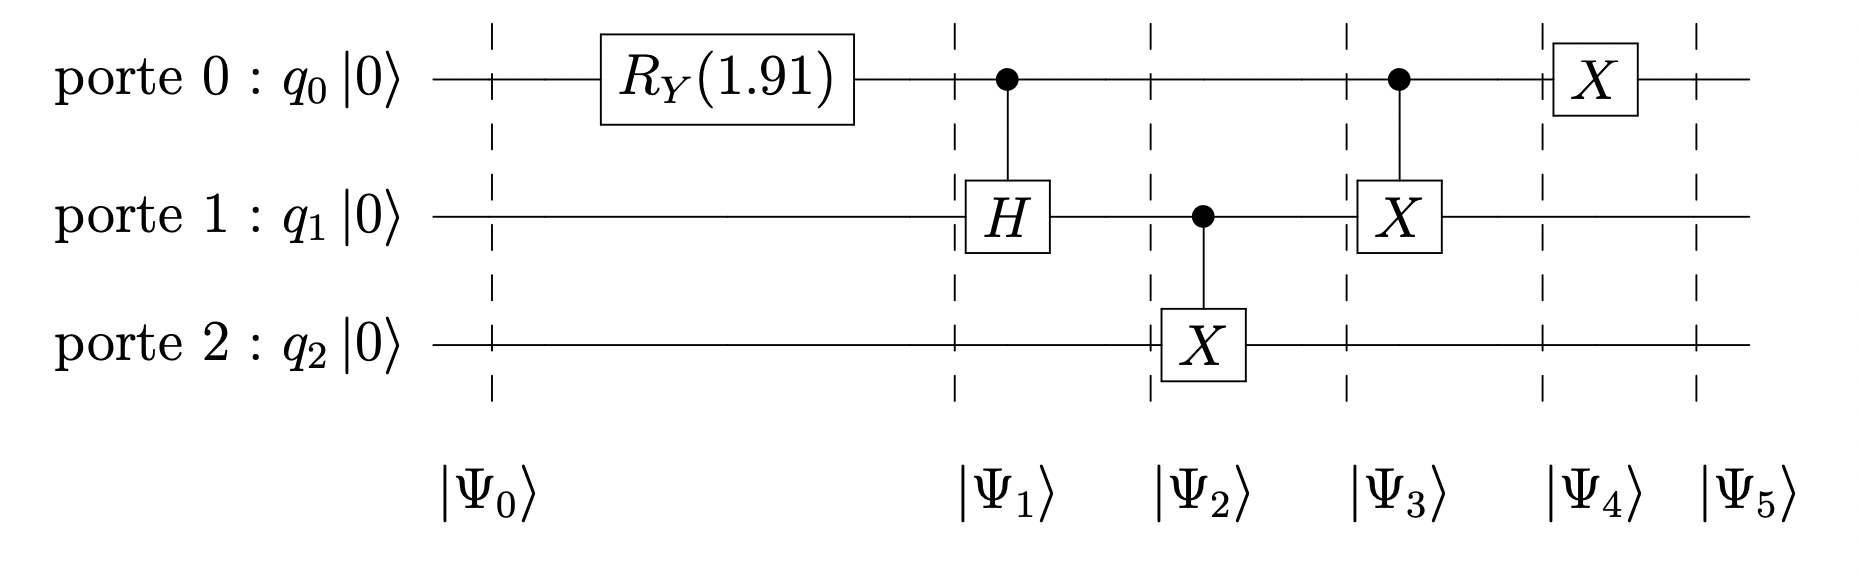

##### Analyse du circuit

Les états que l'on peut retrouver sur le circuit sont:

- $\Psi_0$: 
    - q_0 = $1 |0> ; q_1 = 1 |0> ; q_2 = 1 |0>$

- $\Psi_1$:
   - q_0 =  $\frac{1}{\sqrt{3}} |0> + \sqrt{\frac{2}{3}} |1>; q_1 = 1 |0> ; q_2 = 1 |0> $

- $\Psi_2$:
    - $\frac{1}{\sqrt{3}} |00> + \frac{1}{\sqrt{3}} |10> + \frac{1}{\sqrt{3}} |11>; q_3 = 1 |0>$

- $\Psi_3$:
    - $\frac{1}{\sqrt{3}} |000> + \frac{1}{\sqrt{3}} |100> + \frac{1}{\sqrt{3}} |111>$

- $\Psi_4$:
    - $\frac{1}{\sqrt{3}} |000> + \frac{1}{\sqrt{3}} |110> + \frac{1}{\sqrt{3}} |101>$

- $\Psi_5$:
    - $\frac{1}{\sqrt{3}} |100> + \frac{1}{\sqrt{3}} |010> + \frac{1}{\sqrt{3}} |001>$

/Users/julienkrause/Documents/UTC/CS/IQ01/TP/venv/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


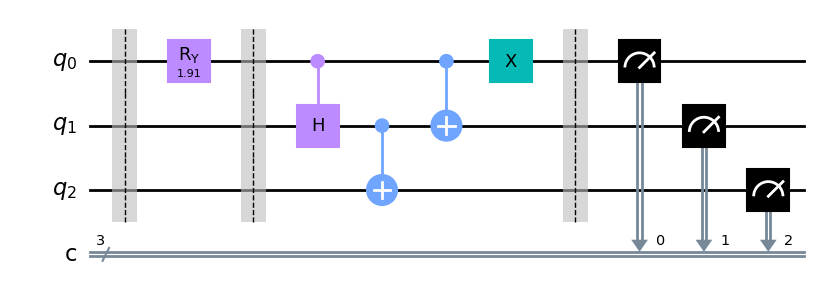

In [25]:
def circuit():
    circuit = QuantumCircuit(3, 3)
    
    circuit.barrier()
    
    circuit.ry(1.91,0)
   
    circuit.barrier()
    circuit.ch(0,1)  
    circuit.cx(1, 2)
    circuit.cx(0, 1)
    circuit.x(0)
    
    circuit.barrier()

    circuit.measure(range(3), range(3))

    return circuit

circuit = circuit()
circuit.draw('mpl')

/var/folders/0l/p5gygr8524q2lxdt1kyk3n4h0000gn/T/ipykernel_85974/2163157290.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


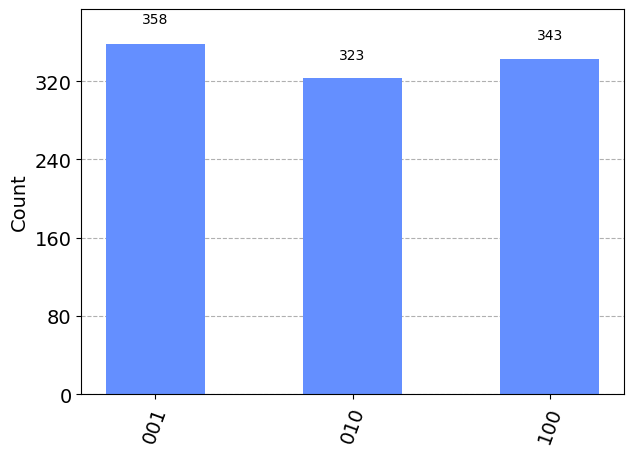

In [27]:
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator)
qobj = assemble(transpiled_circuit)
result = simulator.run(qobj).result()
counts = result.get_counts()

plot_histogram(counts)

On retrouve environ les probabilitées correspondant aux états de sortie. Cette probabilité étant de $\frac{1}{3}$.

Ce circuit n'est pas suffisant pour répondre au problème de Monty Hall. Il met en place la situation de la question 1 mais ne prend pas en compte le potentiellement changement porte et les probabilités associés. Il n'apporte donc pas de réponse au problème initial.

#### Question 3.3.1

Voici le circuit modifié reprenant le problème de Monty Hall sous forme quantique.

/Users/julienkrause/Documents/UTC/CS/IQ01/TP/venv/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


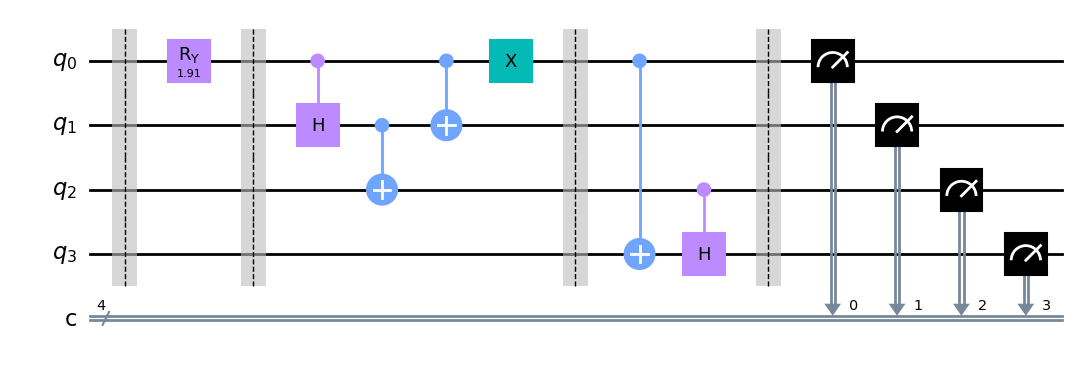

In [29]:
def monty_hall_circuit():
    circuit = QuantumCircuit(4, 4)

    
    
    circuit.barrier()
    
    circuit.ry(1.91,0)
   
    circuit.barrier()
    circuit.ch(0,1)  
    circuit.cx(1, 2)
    circuit.cx(0, 1)
    circuit.x(0)
    
    circuit.barrier()

    circuit.cx(0,3)
    circuit.ch(2,3)

    circuit.barrier()

    # Mesurer les résultats
    circuit.measure(range(4), range(4))

    return circuit

circuit = monty_hall_circuit()
circuit.draw('mpl')

#### Question 3.2

L'état de sortie après ce nouveau circuit sera:

$\frac{1}{\sqrt{3}} |1001> + \frac{1}{\sqrt{3}} |0100> + \frac{1}{\sqrt{6}} |0010> + |0011>$

#### Question 3.3

/var/folders/0l/p5gygr8524q2lxdt1kyk3n4h0000gn/T/ipykernel_85974/2163157290.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


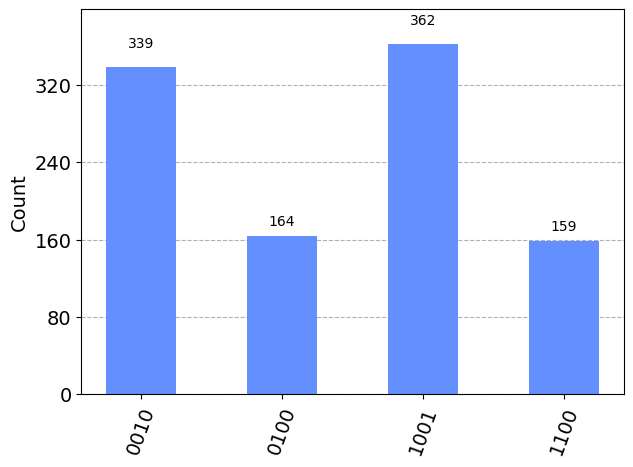

In [30]:
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator)
qobj = assemble(transpiled_circuit)
result = simulator.run(qobj).result()
counts = result.get_counts()

plot_histogram(counts)

A la suite de la simulation on obtient 4 possibilités.

- $|1001>$: Cela correspond à la situation où la voiture se trouve derrière la porte 0 et Monty ouvre la porte 1. Dans ce cas la stratégie gagnante est la stratégie 2. Comme vu dans l'état de sortie de du circuit et confirmé par la simulation; la probabilité d'être dans ce cas est de $\frac{1}{3}$.

- $|0100$: Cela correspond à la situation où la voiture se trouve derrière la porte 1 et Monty ouvre la porte 0. Dans ce cas la stratégie gagnante est la stratégie 2. Comme vu dans l'état de sortie de du circuit et confirmé par la simulation; la probabilité d'être dans ce cas est de $\frac{1}{3}$.

- $|0010>$: Cela correspond à la situation où la voiture se trouve derrière la porte 2 et Monty ouvre la porte 0. Dans ce cas la stratégie gagnante est la stratégie 1. Comme vu dans l'état de sortie de du circuit et confirmé par la simulation; la probabilité d'être dans ce cas est de $\frac{1}{6}$.

- $|0011>$: Cela correspond à la situation où la voiture se trouve derrière la porte 2 et Monty ouvre la porte 1. Dans ce cas la stratégie gagnante est la stratégie 1. Comme vu dans l'état de sortie de du circuit et confirmé par la simulation; la probabilité d'être dans ce cas est de $\frac{1}{6}$.

Ainsi la meilleure stratégie à adopter est la seconde. En changeant constamment son choix après l'ouverture d'une porte par Monty, on a une probabilité de trouver la voiture de $\frac{2}{3}$. Tandis qu'en gardant son premier choix. C'est à dire qu'on ne change pas de porte une fois que Monty ait ouvert une porte. La probabilité de trouver une voiture tombe alors à $\frac{1}{3}$